# White Wine Quality
## RFC, SVC, NN
### Two Categories
#### December 11, 2020

In [72]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model imort SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline



In [73]:
#Loading dataset
df = pd.read_csv("winequality-white.csv",sep=';')
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)




In [74]:
df.head()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [76]:
df.isnull().sum()



fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Identify and Remove Outliers
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values.</p>

In [77]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR

ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    
    
  

In [78]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


In [79]:
#Preprocessing Data
#Reclassify the data into two bins, bad and good
# bin quality values using .cut()
bins = (2, 6.5, 9) #original
#bins = (3, 4.5, 6.5, 9.5) #test to see if I could separate it into three
group_names = ["bad", "good"]
#cutting out wine quality and replacing it
df["quality"] = pd.cut(df['quality'], bins = bins, labels = group_names)



In [80]:
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad


In [81]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         3951 non-null   float64 
 1   volatile_acidity      3951 non-null   float64 
 2   citric_acid           3951 non-null   float64 
 3   residual_sugar        3951 non-null   float64 
 4   chlorides             3951 non-null   float64 
 5   free_sulfur_dioxide   3951 non-null   float64 
 6   total_sulfur_dioxide  3951 non-null   float64 
 7   density               3951 non-null   float64 
 8   pH                    3951 non-null   float64 
 9   sulphates             3951 non-null   float64 
 10  alcohol               3951 non-null   float64 
 11  quality               3951 non-null   category
dtypes: category(1), float64(11)
memory usage: 534.4 KB


In [82]:
df["quality"].unique()



['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         3951 non-null   float64 
 1   volatile_acidity      3951 non-null   float64 
 2   citric_acid           3951 non-null   float64 
 3   residual_sugar        3951 non-null   float64 
 4   chlorides             3951 non-null   float64 
 5   free_sulfur_dioxide   3951 non-null   float64 
 6   total_sulfur_dioxide  3951 non-null   float64 
 7   density               3951 non-null   float64 
 8   pH                    3951 non-null   float64 
 9   sulphates             3951 non-null   float64 
 10  alcohol               3951 non-null   float64 
 11  quality               3951 non-null   category
dtypes: category(1), float64(11)
memory usage: 534.4 KB


In [84]:
df[df.isnull().any(axis=1)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [85]:
label_quality = LabelEncoder()
df["quality"] = label_quality.fit_transform(df["quality"])


In [86]:
df.head(20)



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3951 non-null   float64
 1   volatile_acidity      3951 non-null   float64
 2   citric_acid           3951 non-null   float64
 3   residual_sugar        3951 non-null   float64
 4   chlorides             3951 non-null   float64
 5   free_sulfur_dioxide   3951 non-null   float64
 6   total_sulfur_dioxide  3951 non-null   float64
 7   density               3951 non-null   float64
 8   pH                    3951 non-null   float64
 9   sulphates             3951 non-null   float64
 10  alcohol               3951 non-null   float64
 11  quality               3951 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 561.3 KB


In [88]:
df["quality"].value_counts()

0    3014
1     937
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

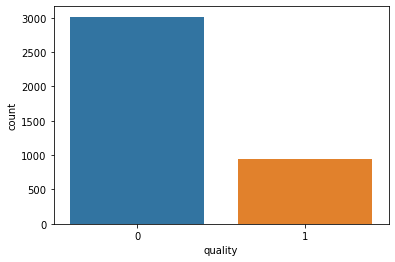

In [89]:
sns.countplot(df["quality"])

In [90]:
#Now separate the dataset as response variable and feature variables

X = df.drop("quality",axis=1)
y = df["quality"]



In [91]:
#Train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [92]:
#Applying Standard Scaling to get optimized result
sc = StandardScaler()
#Fit-transform the training data
X_train = sc.fit_transform(X_train)
#Only transform the testing data
X_test = sc.transform(X_test)




In [93]:
X_train[:10]



array([[ 1.31950000e-01, -1.09980848e+00,  7.39997711e-02,
        -1.09655886e+00,  1.17603574e+00, -7.21421198e-01,
         6.59539271e-01, -4.37519519e-01,  1.69604011e+00,
         2.79898915e-01, -6.84955696e-02],
       [-5.59414615e-01,  4.67714683e-01,  4.34491975e-01,
        -8.90217225e-01,  9.73844615e-01, -1.12292840e+00,
         9.60220080e-02, -3.91981347e-01,  1.40149808e+00,
         4.82854530e-01, -6.84955696e-02],
       [-5.59414615e-01, -1.85419966e-01,  7.39997711e-02,
        -9.52119715e-01, -5.42588853e-01,  1.46753424e-02,
        -5.89999008e-01, -7.73801407e-01,  2.96965475e-01,
         1.80206603e+00,  1.42954186e-02],
       [ 1.31950000e-01, -9.69181546e-01,  1.99662486e+00,
         5.89542858e-02, -6.43684417e-01,  9.51525485e-01,
         8.55545276e-01, -2.27343339e-01,  7.60589539e-02,
        -2.15556847e+00,  7.59414313e-01],
       [ 8.23314615e-01,  4.67714683e-01, -1.24780498e+00,
        -2.19606918e-01,  1.07494018e+00, -1.19160392e-01,
  

In [94]:

X_test[:10]


array([[-0.83596046,  0.07583389, -0.0461643 , -0.0029482 ,  0.56946236,
         0.81768975,  0.53703552, -0.36045492,  0.14969446,  1.19319918,
         0.34545937],
       [ 0.68504169,  0.72896854,  0.31432791, -1.0140222 ,  0.77165349,
        -1.79210708,  0.63503852, -0.4935665 ,  0.37060098, -0.63340135,
         0.09708641],
       [ 0.54676877, -0.83855462, -0.28649243, -0.89021722, -0.34039772,
         0.55001828,  1.24755728, -0.96295997,  0.81241402, -0.73487916,
         1.17336925],
       [ 0.13195   , -0.3160469 ,  0.07399977, -0.95211971, -0.74477998,
         0.81768975, -0.02648174, -1.34828297,  0.517872  , -0.83635697,
         1.67011518],
       [-1.11250631, -0.96918155, -0.4066565 , -1.07592469,  0.46836679,
         2.1560471 ,  0.36553026, -0.78781315,  2.57966619,  1.09172138,
         0.42825036],
       [-0.28286877,  0.85959547, -0.0461643 ,  1.91602898,  1.17603574,
         1.82145776,  2.20308656,  1.2228723 ,  0.44423649,  0.78728795,
        -0.151

## Random Forest Classifier



In [95]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [96]:
#How well did the model perform
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       604
           1       0.77      0.62      0.69       187

    accuracy                           0.87       791
   macro avg       0.83      0.78      0.80       791
weighted avg       0.86      0.87      0.86       791

[[570  34]
 [ 71 116]]


Good at predicting bad wine; not so good at predicting good wine

## SVM Classifier

In [97]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)


In [98]:
#How did the model perform
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       604
           1       0.72      0.36      0.48       187

    accuracy                           0.82       791
   macro avg       0.78      0.66      0.69       791
weighted avg       0.80      0.82      0.79       791

[[578  26]
 [119  68]]



Good at predicting bad wine; better at predicting good wine than RFC, but still not great.


## Neural Network

In [99]:
#mlpc = multi-layerer perceptron classifier
#started out with max_iter=500, but got warning that convergence wasn't reached
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter=2000)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)



In [100]:
#How did the model perform
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))


              precision    recall  f1-score   support

           0       0.87      0.88      0.87       604
           1       0.60      0.56      0.58       187

    accuracy                           0.81       791
   macro avg       0.73      0.72      0.73       791
weighted avg       0.80      0.81      0.80       791

[[533  71]
 [ 82 105]]


In [101]:
#predict new data...Don't forget to transform it.
Xnew = [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew


array([0])